# Data Profiling: Fintech Dataset

Import statements

In [10]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import savefig, show, subplots
from ds_charts import get_variable_types, choose_grid, HEIGHT, plot_clusters


Load data:

In [11]:
register_matplotlib_converters()
train_dataset = pd.read_csv('../data/Fintech/train.csv', index_col='TRANSACTION_ID')
customer_list = pd.read_csv('../data/Fintech/customer.csv')
terminal_list = pd.read_csv('../data/Fintech/terminal.csv')

Get frequency of customers in the dataset:

In [12]:
train_dataset['CUSTOMER_ID'].nunique()

998

In [19]:
train_dataset['TERMINAL_ID'].nunique()

1994

Get the number of transactions each customer has in the dataset:

In [14]:
train_dataset['CUSTOMER_ID'].value_counts().nlargest(10)

775    641
382    639
940    638
112    631
379    629
329    619
164    616
65     614
288    612
917    611
Name: CUSTOMER_ID, dtype: int64

In [15]:
train_dataset['TERMINAL_ID'].value_counts().nlargest(10)

1227    495
565     489
1211    429
115     429
1916    420
1488    420
1117    403
1238    396
1300    383
309     377
Name: TERMINAL_ID, dtype: int64

We can verify that each customer and terminal capture multiple transactions throughout the training dataset, this can allow for the models created to capture spending patterns.

Merge terminal info and customer info onto the dataset

In [16]:
train_dataset = train_dataset.merge(customer_list).merge(terminal_list)
train_dataset

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
1,2021-08-12 13:40:45,323,217,12.40,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
2,2021-08-12 20:20:23,323,217,4.39,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
3,2021-08-13 10:05:50,323,217,7.41,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
4,2021-08-14 13:07:25,323,217,9.79,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291226,2021-12-04 06:06:20,864,1800,144.30,0,0.476838,30.118781,92.446276,46.223138,1.050457,"[1, 466, 503, 551, 710, 1523, 1800, 1866]",8,0.956689,25.195142
291227,2021-12-05 05:30:27,864,1800,78.33,0,0.476838,30.118781,92.446276,46.223138,1.050457,"[1, 466, 503, 551, 710, 1523, 1800, 1866]",8,0.956689,25.195142
291228,2021-12-14 14:19:39,864,1800,70.61,0,0.476838,30.118781,92.446276,46.223138,1.050457,"[1, 466, 503, 551, 710, 1523, 1800, 1866]",8,0.956689,25.195142
291229,2021-12-16 18:12:55,864,1800,68.72,0,0.476838,30.118781,92.446276,46.223138,1.050457,"[1, 466, 503, 551, 710, 1523, 1800, 1866]",8,0.956689,25.195142


### Plot Numerical Data

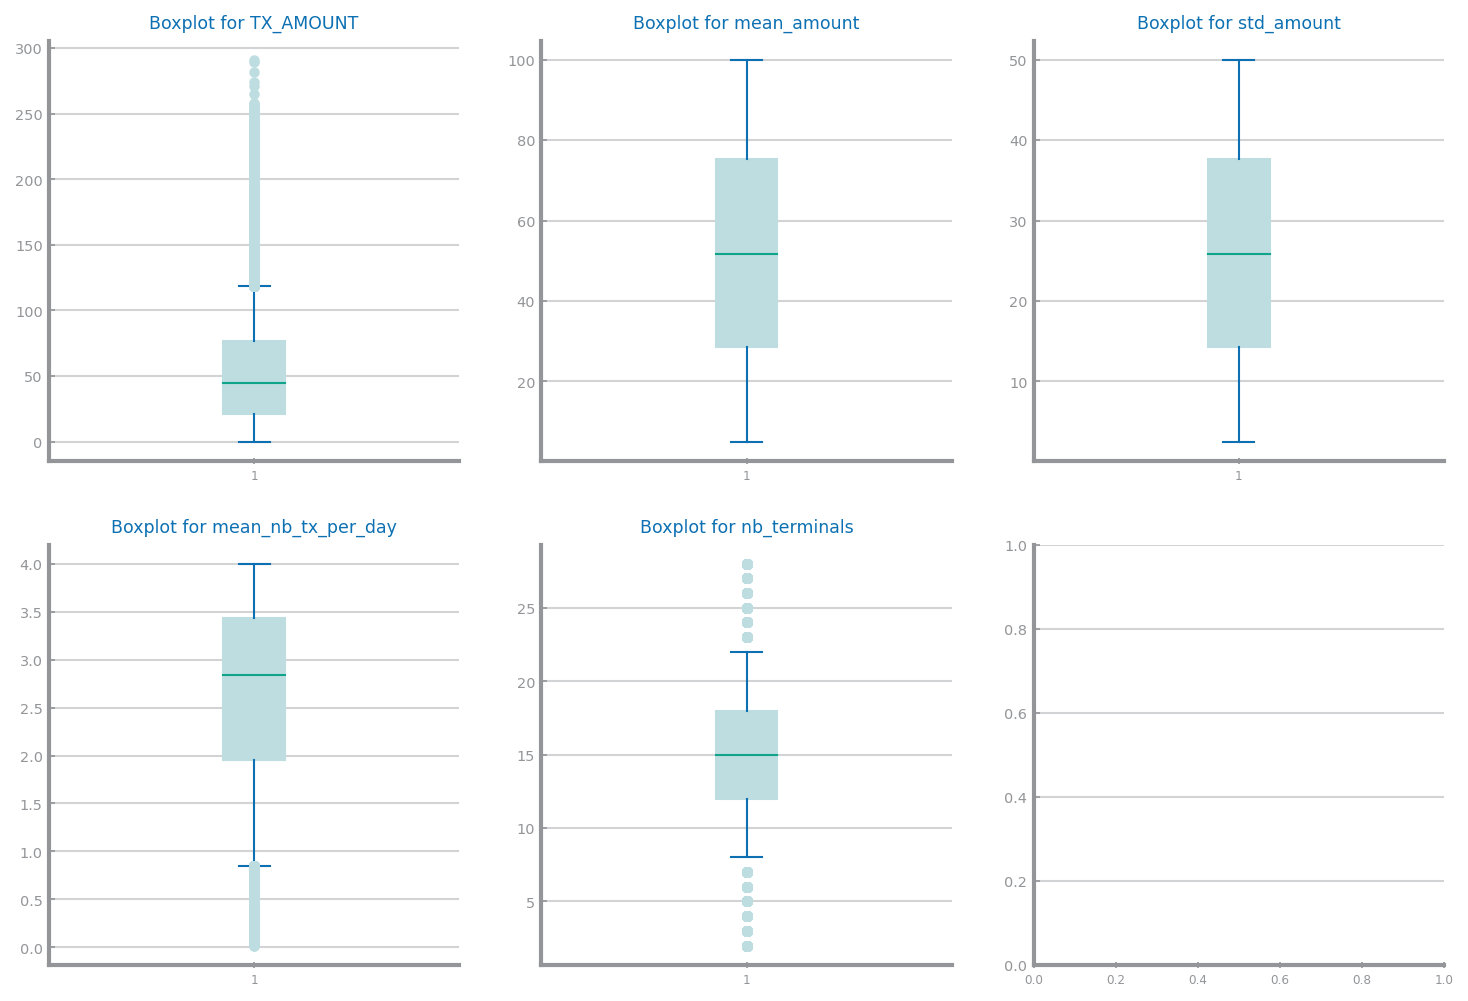

In [17]:
vars = ['TX_AMOUNT', 'mean_amount', 'std_amount', 'mean_nb_tx_per_day', 'nb_terminals']

rows, cols = choose_grid(len(vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(vars)):
    axs[i, j].set_title('Boxplot for %s'%vars[n])
    axs[i, j].boxplot(train_dataset[vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
#savefig('images/single_boxplots.png')
show()

Distribution of values between variables:

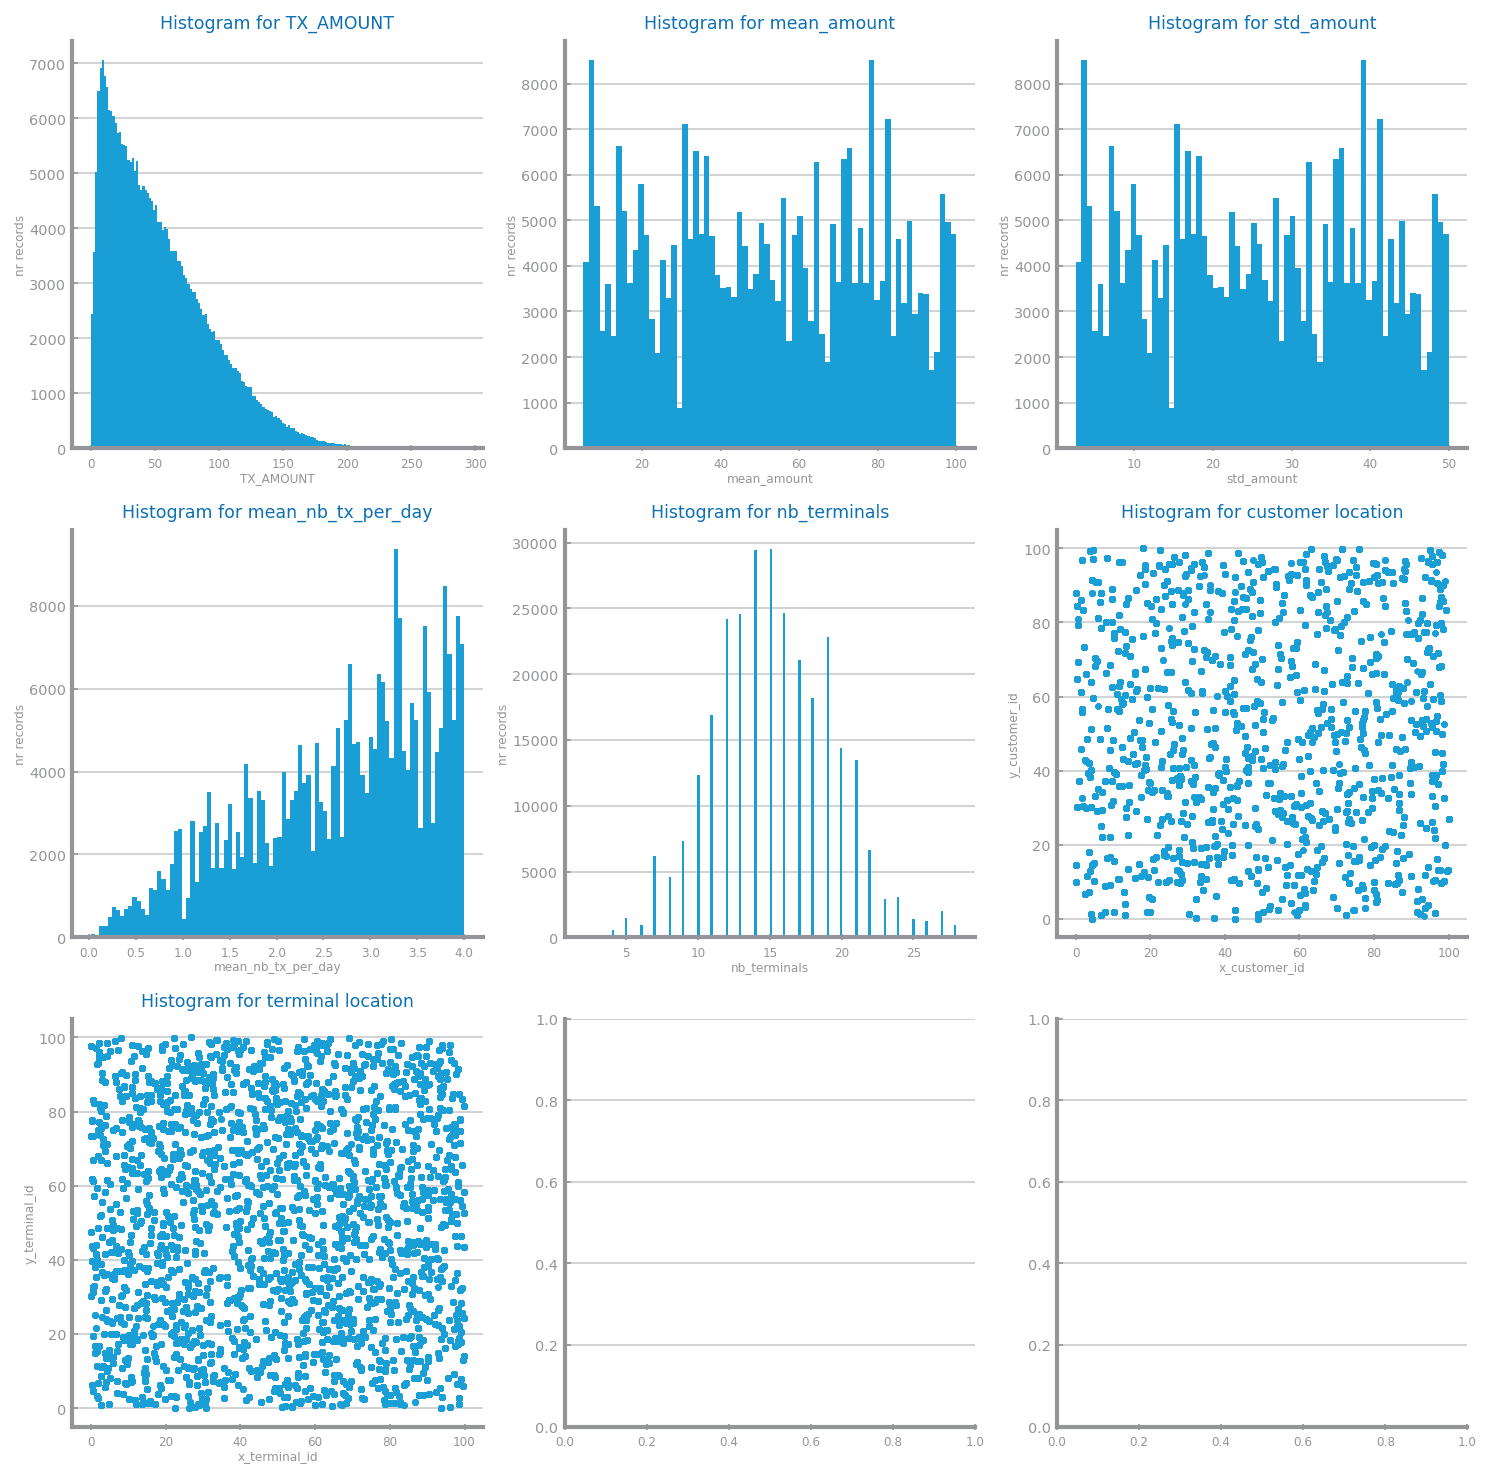

In [18]:
vars = ['TX_AMOUNT', 'mean_amount', 'std_amount', 'mean_nb_tx_per_day', 'nb_terminals']
rows, cols = choose_grid(len(vars)+2)
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0

#for numeric variables that are not dependant on each other:
for n in range(len(vars)):
    axs[i, j].set_title('Histogram for %s'%vars[n])
    axs[i, j].set_xlabel(vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(train_dataset[vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

# for coordinate variables:
#plot_clusters(train_dataset, 'x_customer_id', 'y_customer_id', clusters=1, centers=None, n_clusters=None, title='Scatter for customer location',ax = axs[1,2])
axs[1, 2].set_title('Histogram for customer location')
axs[1, 2].set_xlabel('x_customer_id')
axs[1, 2].set_ylabel("y_customer_id")
axs[1,2].scatter(train_dataset['x_customer_id'], train_dataset['y_customer_id'])

axs[2,0].set_title('Histogram for terminal location')
axs[2,0].set_xlabel('x_terminal_id')
axs[2,0].set_ylabel("y_terminal_id")
axs[2,0].scatter(train_dataset['x_terminal_id'], train_dataset['y_terminal_id'])


#savefig('images/single_histograms_numeric.png')

show()